[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

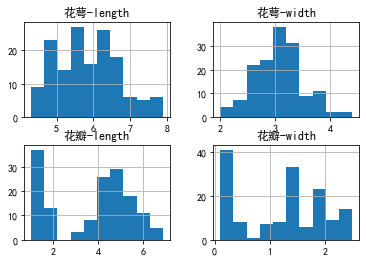

        花萼-length    花萼-width   花瓣-length    花瓣-width
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


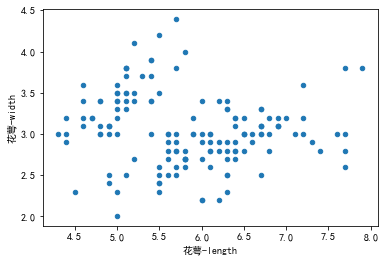

C:\Users\86172\anaconda3\envs\environment1\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


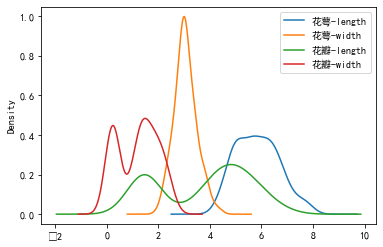

AttributeError: 'Series' object has no attribute 'data'

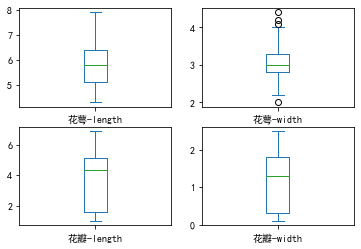

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
 
 
from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']    #用于画图时显示中文
 
 
from sklearn.datasets import load_iris #导入数据集iris  
iris = load_iris() #载入数据集
print(iris.data)  #打印输出数据集
 
 
#共150条记录，分别代表50条山鸢尾 (Iris-setosa)、变色鸢尾(Iris-versicolor)、维吉尼亚鸢尾(Iris-virginica)
print(iris.target) 
 
iris.data.shape  # iris数据集150行4列的二维数组
 
 
 
 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"  
names = ['花萼-length', '花萼-width', '花瓣-length', '花瓣-width', 'class']  
dataset = pd.read_csv(url, names=names)
 
 
#************************可视化显示*************************************#
#显示直方图
zhifangtu=dataset.hist() #数据直方图histograms
plt.show(zhifangtu.data) 
 
 
print(dataset.describe())
 
 
#显示散点图
sandian=dataset.plot(x='花萼-length', y='花萼-width', kind='scatter') #散点图，x轴表示花萼长度，y轴表示花萼宽度
plt.show(sandian)  
 
 
#kde图
plt.show(dataset.plot(kind='kde')) #KDE图，也被称作密度图(Kernel Density Estimate,核密度估计)
 
 
#显示箱图
#kind='box'绘制箱图,包含子图且子图的行列布局layout为2*2，子图共用x轴、y轴刻度，标签为False
xiangtu = dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
 
plt.show(xiangtu.data)
 
 
 
#*****************************线性回归*************************************#
 
pos = pd.DataFrame(dataset)
#获取花瓣的长和宽，转换Series为ndarray
x = pos['花瓣-length'].values
y = pos['花瓣-width'].values
x = x.reshape(len(x),1)
y = y.reshape(len(y),1)
 
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x,y)
pre = clf.predict(x)
 
plt.scatter(x,y,s=100)
plt.plot(x,pre,'r-',linewidth=4)
for idx, m in enumerate(x):  
    plt.plot([m,m],[y[idx],pre[idx]], 'g-')  
plt.show()
 
#*****************************决策树分析***********************************#
 
from sklearn.datasets import load_iris   
from sklearn.tree import DecisionTreeClassifier     
iris = load_iris()      
clf = DecisionTreeClassifier()    
clf.fit(iris.data, iris.target)     
predicted = clf.predict(iris.data)    
    
#获取花卉两列数据集      
L1 = pos['花萼-length'].values   
L2 = pos['花萼-width'].values   
  
    
import numpy as np    
import matplotlib.pyplot as plt    
plt.scatter(L1, L2, c=predicted, marker='x')  #cmap=plt.cm.Paired    
plt.title("DTC")    
plt.show()  
 
 
#将iris_data分为70%的训练，30%的进行预测 然后进行优化 输出准确率、召回率等，优化后的完整代码如下：
 
 
from sklearn.tree import DecisionTreeClassifier    
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
x_train,x_test,y_train,y_test = train_test_split(iris.data,iris.target, test_size=0.3)
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)
predict_target = clf.predict(x_test)
 
print(sum(predict_target == y_test)) #预测结果与真实结果比对
print(metrics.classification_report(y_test,predict_target))
print(metrics.confusion_matrix(y_test,predict_target))
 
L1 = [n[0] for n in x_test]
L2 = [n[1] for n in x_test]
plt.scatter(L1,L2, c=predict_target,marker='x')
plt.title('决策树分类器')
plt.show()
 
 
 
#*****************************KMeans聚类分析*******************************#
 
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
iris = load_iris()
clf = KMeans()
clf.fit(iris.data,iris.target)
predicted = clf.predict(iris.data)
 
pos = pd.DataFrame(dataset)    
L1 = pos['花萼-length'].values   
L2 = pos['花萼-width'].values    
 
plt.scatter(L1, L2, c=predicted, marker='s',s=100,cmap=plt.cm.Paired)    
plt.title("KMeans聚类分析")    
plt.show() 
 
#*******************************************
 
 
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
 
# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
 
# Load data
iris = load_iris()
 
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target
 
    # Train
    clf = DecisionTreeClassifier().fit(X, y)
 
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
 
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
 
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
 
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
 
plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")
plt.show()